In [1]:
import numpy as np 
import pandas as pd 


In [3]:
X = pd.read_csv('mnist_X.csv')

In [4]:
y = pd.read_csv('mnist_y.csv') 

In [5]:
type(X)

pandas.core.frame.DataFrame

In [6]:
X = X.values 

In [7]:
type(X) 

numpy.ndarray

In [9]:
X[0,:].reshape(28,28)  

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

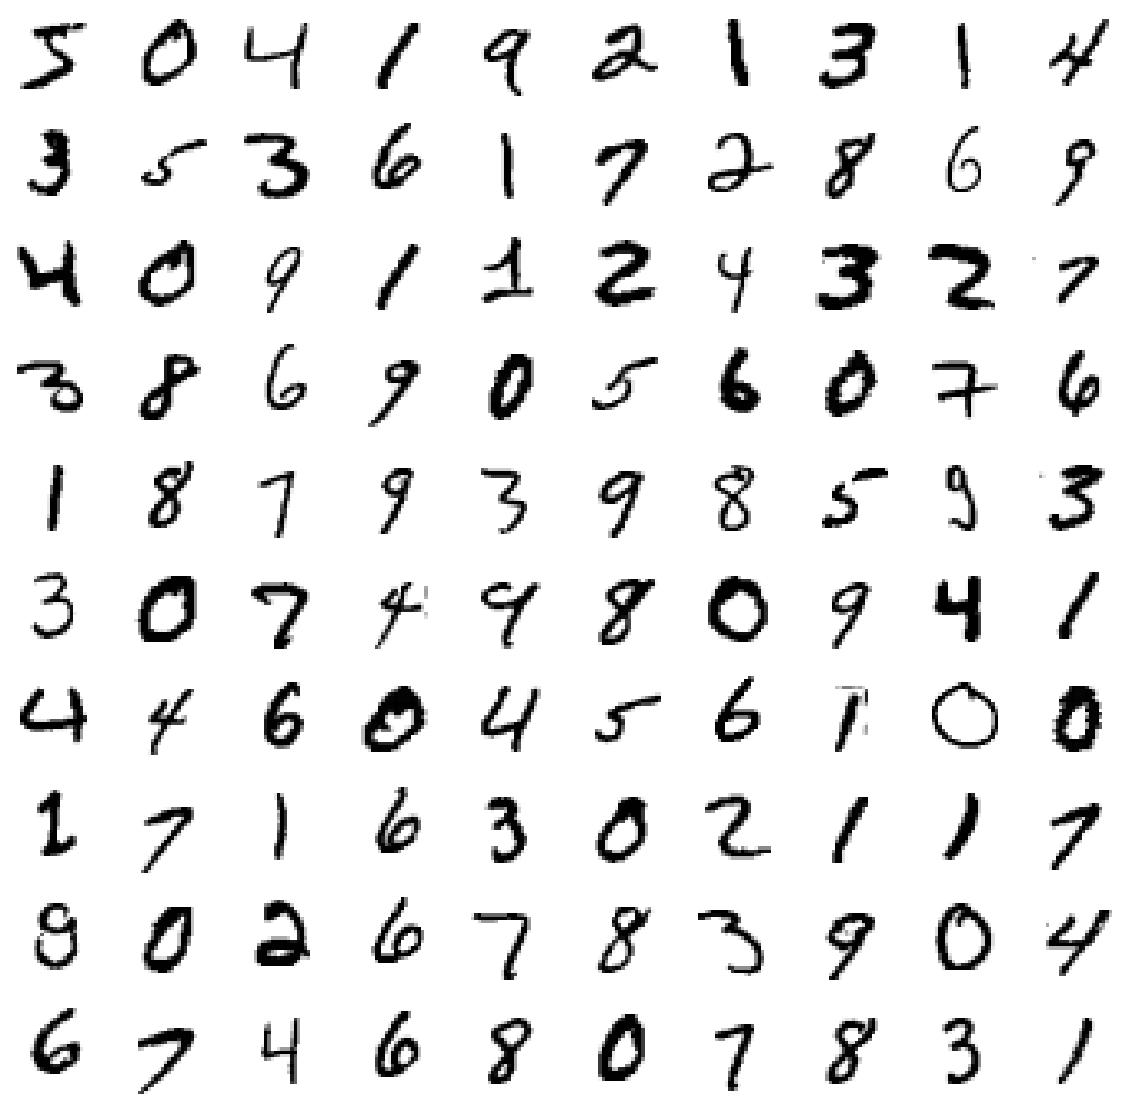

In [11]:
import matplotlib.pyplot as plt 
n = 10

fig, ax = plt.subplots(n,n, figsize = (20,20))


posicion = 0
for i in range(n):
    for j in range(n):
        ax[i][j].imshow(X[posicion,:].reshape(28,28), cmap = 'binary')
        ax[i][j].axis('off') 
        posicion+=1

        
plt.show()        

# Construcción de un modelo de clasificación binaria

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Dividir en entrenamiento y testeo 

In [12]:
X_train, X_test, y_train,y_test = X[:60_000, :], X[60_000:, :], y[:60_000], y[60_000:]

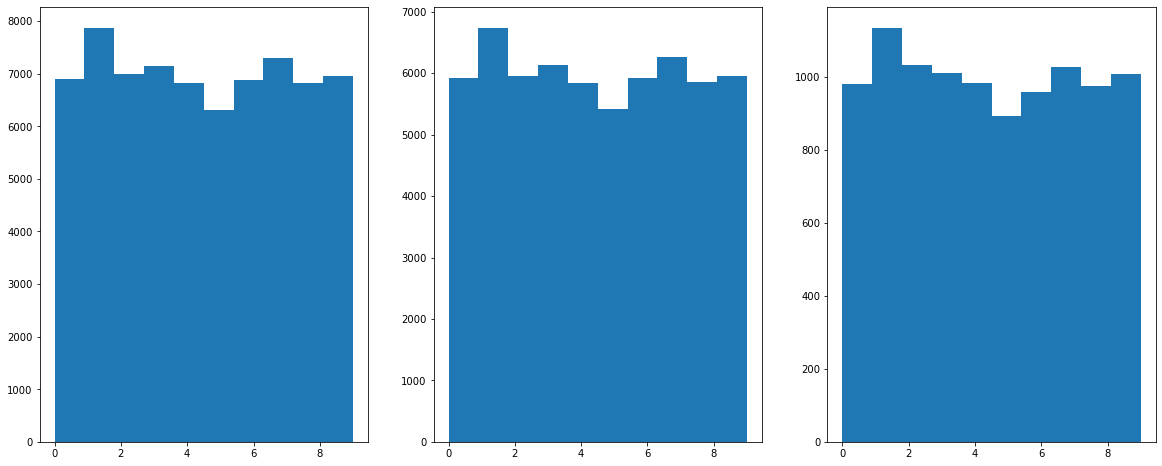

In [13]:
fig, ax = plt.subplots(1,3, figsize = (20,8))

ax[0].hist(y)
ax[1].hist(y_train)
ax[2].hist(y_test)

plt.show() 

In [14]:
from sklearn.linear_model import SGDClassifier 

In [15]:
sgd_clf = SGDClassifier(random_state = 42)  

In [21]:
y_train_5 = y_train_5.values.ravel() 

In [22]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [25]:
sgd_clf.predict([X[2,:]])

array([False])

# Veamos el comportamiento del clasificador en el conjunto de entrenamiento 

In [26]:
y_pred = sgd_clf.predict(X_train)

In [27]:
n_coincidencias = sum(y_train_5 == y_pred)

In [28]:
precision = n_coincidencias/len(y_train_5) 
precision 

0.9522666666666667

# Metodología de validación cruzada para ver que poder de generalización tiene nuestro clasificación

## Hacemos una validación cruzada personalizada

In [41]:
from sklearn.model_selection import StratifiedKFold 

from sklearn.base import clone 

skd = StratifiedKFold(n_splits = 3) 

for train_index, test_index in skd.split(X_train, y_train_5):
    clon_sgd = clone(sgd_clf)
    X_train_sub = X_train[train_index,:]
    y_train_sub = y_train.values.ravel()[train_index]
    X_test_sub = X_train[test_index,:]
    y_test_sub = y_train.values.ravel()[test_index]
    clon_sgd.fit(X_train_sub, y_train_sub)
    y_pred_sub = clon_sgd.predict(X_test_sub)
    n_coincidencias = sum(y_test_sub==y_pred_sub)
    print(n_coincidencias/len(y_test_sub)) 

0.8787
0.8495
0.85815


In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
puntajes = cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy') 

In [37]:
puntajes  

array([0.95035, 0.96035, 0.9604 ])

# Luego hace la validación crezada estandar